# Multiple Linear Regression

In [3]:
#importing necessary modules

import pandas as pd                    #module used for data manipulation
import matplotlib.pyplot as plt        #module used for data visualization and used by seaborn module
import sklearn                         #module used for linear regression and importing preloaded data available in this module
import seaborn as sns                  #module used for visualizing statistical graphs

Importing 'diabetes' data from datasets available in 'sklearn' module-

In [4]:
from sklearn import datasets        #importing datasets
df=datasets.load_diabetes()         #loading diabetes dataset

In [5]:
# finding which type of dataset is
type(df)

sklearn.utils._bunch.Bunch

In [6]:
# showing dataset's keys
print(list(df))

['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module']


In [7]:
#dataset description
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
#printing feature name
print(df.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [17]:
#Creating dataframe of attributes data
x=pd.DataFrame(df.data,columns=df.feature_names)
x.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
111,0.019913,-0.044642,0.004572,-0.026328,0.023198,0.010273,0.067048,-0.039493,-0.023647,-0.046641
229,-0.027310,0.050680,-0.015906,-0.029770,0.003935,-0.000688,0.041277,-0.039493,-0.023647,0.011349
421,0.038076,0.050680,0.016428,0.021872,0.039710,0.045032,-0.043401,0.071210,0.049770,0.015491
363,-0.049105,0.050680,-0.024529,0.000079,-0.046975,-0.028245,-0.065491,0.028405,0.019196,0.011349
185,-0.074533,0.050680,-0.018062,0.008101,-0.019456,-0.024800,-0.065491,0.034309,0.067318,-0.017646


In [18]:
#storing target variable
y=df.target
print(y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [11]:
# showing target and attribute variables in a dataframe
data=x
data['target_var']=y
data.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target_var
62,-0.027310,0.050680,-0.007284,-0.040099,-0.011201,-0.013840,0.059685,-0.039493,-0.082379,-0.025930,52.0
230,-0.038207,0.050680,0.071397,-0.057313,0.153914,0.155887,0.000779,0.071948,0.050281,0.069338,220.0
313,0.059871,0.050680,0.053074,0.052858,0.032830,0.019667,-0.010266,0.034309,0.055203,-0.001078,163.0
71,-0.001882,-0.044642,0.033673,0.125158,0.024574,0.026243,-0.010266,-0.002592,0.026717,0.061054,270.0
403,-0.020045,-0.044642,0.097264,-0.005670,-0.005697,-0.023861,-0.021311,-0.002592,0.061684,0.040343,275.0


In [12]:
data.describe()           #summary of dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target_var
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [13]:
#importing sub-module for linear regression analysis
from sklearn.linear_model import LinearRegression
reg = LinearRegression()      #creating linear regression instance

Taking attribute variables as independent variables and target variable as dependent variable

In [19]:
model=reg.fit(x,y)         # x contains independent variables and y contains dependent variable 

Coefficient and intercept of fitted model

In [20]:
coeff = pd.Series(model.coef_, index = x.columns)
intercept = model.intercept_
print("Coefficients are")
print(coeff)

print("\n \n Intercept -")

print(intercept)

Coefficients are
age    -10.009866
sex   -239.815644
bmi    519.845920
bp     324.384646
s1    -792.175639
s2     476.739021
s3     101.043268
s4     177.063238
s5     751.273700
s6      67.626692
dtype: float64

 
 Intercept -
152.13348416289597


To find predicted values of model-

In [21]:
y1=model.predict(x)
y1

array([206.11667725,  68.07103297, 176.88279035, 166.91445843,
       128.46225834, 106.35191443,  73.89134662, 118.85423042,
       158.80889721, 213.58462442,  97.07481511,  95.10108423,
       115.06915952, 164.67656842, 103.07814257, 177.17487964,
       211.7570922 , 182.84134823, 148.00326937, 124.01754066,
       120.33362197,  85.80068961, 113.1134589 , 252.45225837,
       165.48779206, 147.71997564,  97.12871541, 179.09358468,
       129.05345958, 184.7811403 , 158.71516713,  69.47575778,
       261.50385365, 112.82234716,  78.37318279,  87.66360785,
       207.92114668, 157.87641942, 240.84708073, 136.93257456,
       153.48044608,  74.15426666, 145.62742227,  77.82978811,
       221.07832768, 125.21957584, 142.6029986 , 109.49562511,
        73.14181818, 189.87117754, 157.9350104 , 169.55699526,
       134.1851441 , 157.72539008, 139.11104979,  72.73116856,
       207.82676612,  80.11171342, 104.08335958, 134.57871054,
       114.23552012, 180.67628279,  61.12935368,  98.72

In [22]:
#importing metrics from sklearn to evaluate different statistics of the model
from sklearn import metrics as mt
print("R-square also known Coefficient of determinant is -")
mt.r2_score(y,y1)     #y1 contains predicted values

R-square also known Coefficient of determinant is -


0.5177484222203498

The R-squared statistic provides an alternative measure of fit. It always takes on a value between 0 and 1. R-square measures the proportion of variability in Y that can be explained using X. An R-square statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression. A number near 0 indicates that the regression did not explain much of the variability in the response. If R-square is 1 that mean model predict value perfectly.

### There is another module 'statsmodel' which is used for Linear Regression Analysis-

In [23]:
import statsmodels.api as sm

In [24]:
#defining regression model

#add constant to predictor variables
x1 = sm.add_constant(x)

#fit linear regression model
model1 = sm.OLS(y, x1).fit()

In [25]:
#summary of the model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           3.83e-62
Time:                        16:55:30   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

In the above summary p-level of constant and coefficient of variables is inspected if p-level is greater than 0.05 (significance level is taken 0.05) then coefficient(variable)=0 , that mean variable has no effect response variable.

Durbin-Watson test is used for testing autocorrelation. here d=2.029, No autocorrelation

# Verifying assumption of Multiple Linear Regression

## 1. Linear Relationship

There exists a linear relationship between each predictor variable and the response variable

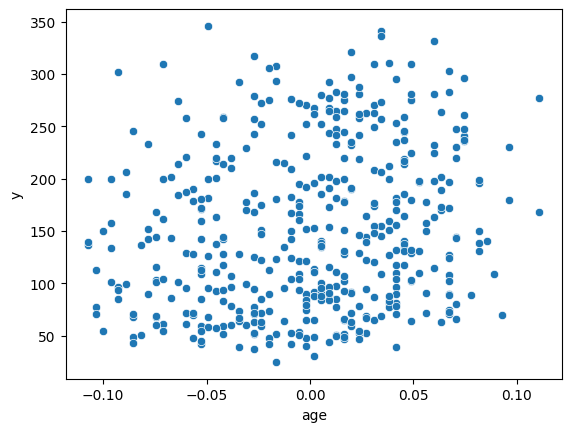

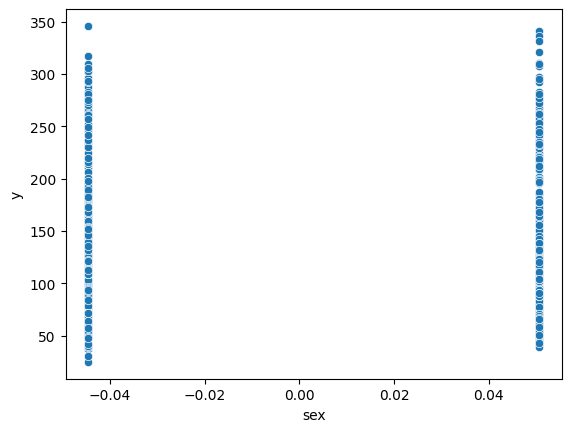

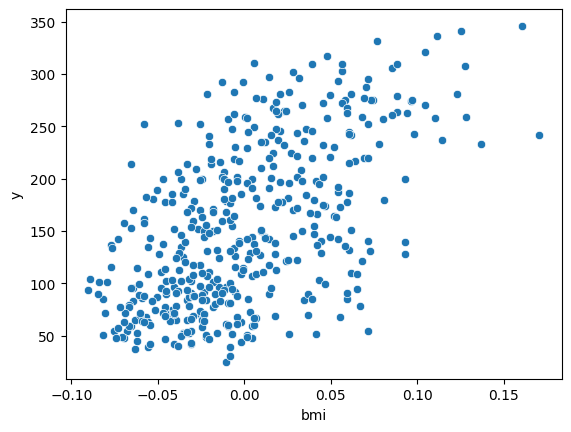

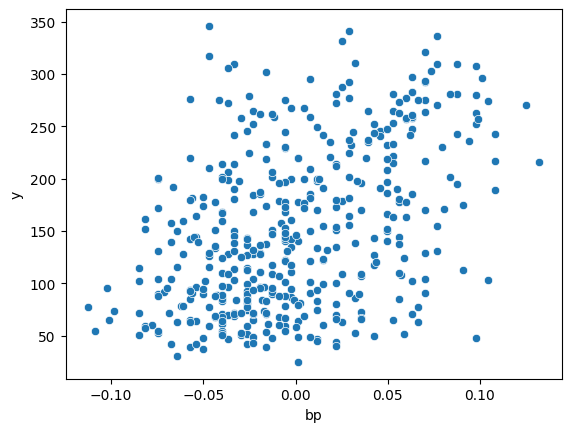

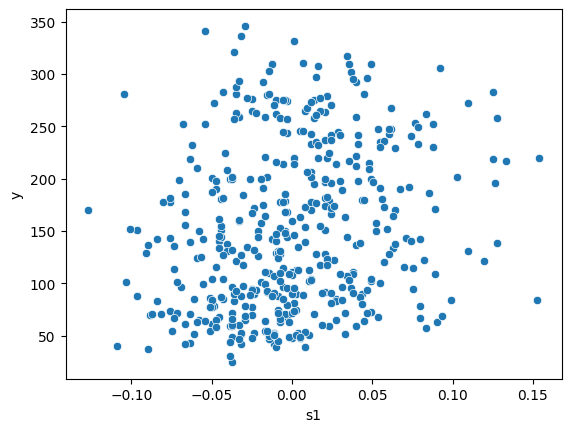

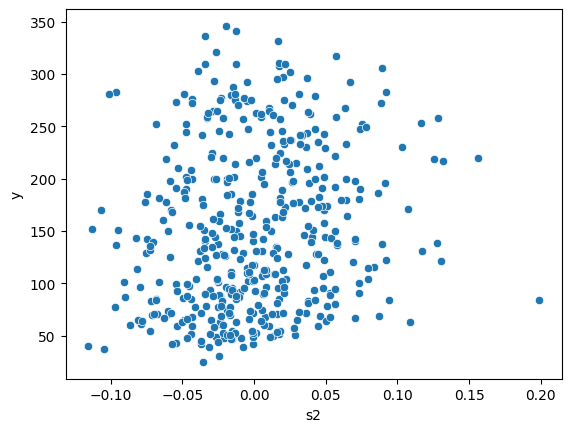

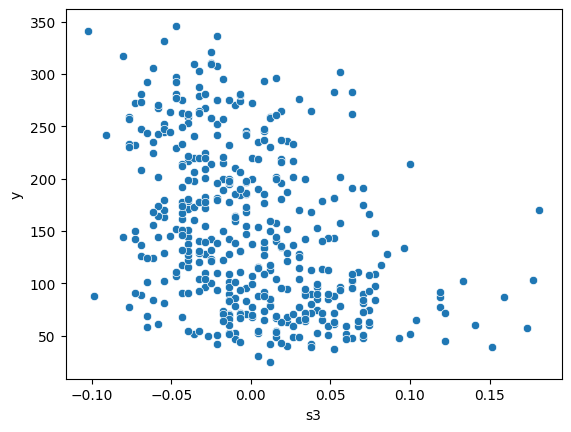

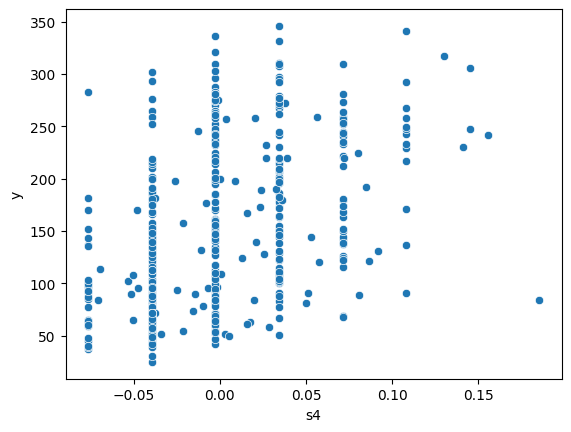

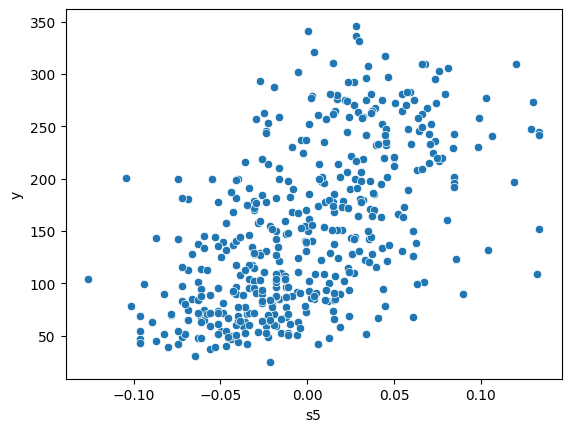

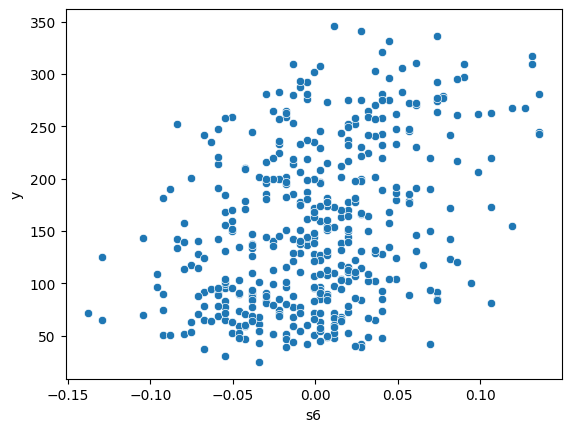

<Figure size 640x480 with 0 Axes>

In [30]:
# we use scatterplot to analyze relationship between response variable and regression variables
for i in df.feature_names:
    sns.scatterplot(data=data,x=i,y=y).set_ylabel("y")
    plt.figure()
    

 In above scatterplots we can see variables 'age','s1','s2' have not linear relationship with response variable. 'Sex' and 's4' are categorical variable.

## 2. No Multicollinearity

None of the predictor variables are highly correlated with each other. When one or more predictor variables are highly correlated, the regression model suffers from multicollinearity, which causes the coefficient estimates in the model to become unreliable.

In [37]:
#correlation between variables
cor=data.corr()
cor

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target_var
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<AxesSubplot: >

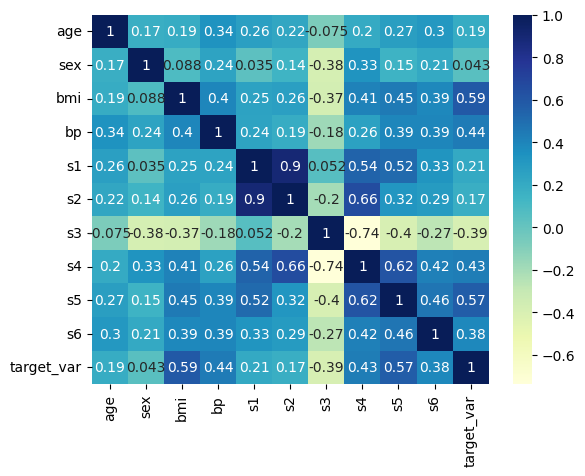

In [40]:
#visualizing correlation level through heatmap
sns.heatmap(cor,cmap="YlGnBu",annot=True)

It is difficult which correlation coefficient level considered as harmful that cause the problem of multicollinearity.        
We also test multicollinearity using vif (variance inflation factor)    
The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model. VIF values start at 1 and have no upper limit. As a general rule of thumb, VIF values greater than 5 indicate potential multicollinearity. Sometimes researchers use a VIF value of 10 instead, depending on the field of study.

In [43]:
#importing necessary packages to find vif and present it in organised manner
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Matrix for linear regression model

Y, X = dmatrices('target_var ~ age+sex+bmi+bp+s1+s2+s3+s4+s5+s6', data=data, return_type='dataframe')

In [49]:
# Calculating VIF for each independent variable

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, j) for j in range(X.shape[1])]
vif['variable'] = X.columns

vif

,VIF,variable
0,1.000000,Intercept
1,1.217307,age
2,1.278071,sex
3,1.509437,bmi
4,1.459428,bp
5,59.202510,s1
6,39.193370,s2
7,15.402156,s3
8,8.890986,s4
9,10.075967,s5


Variable s1,s2,s3,s4,s5 causes harmful multicollinearity in the model.

## 3. Homoscedasticity

The residuals have constant variance at every point in the linear model. When this is not the case, the residuals are said to suffer from heteroscedasticity.  
The simplest way to determine if this assumption is met is to create a plot of residuals versus predicted values. The predicted values for the response variable on the x-axis and the residuals of the model on the y-axis.
If the points in the scatter plot exhibit a pattern, then heteroscedasticity is present.

In [34]:
#first get the residuals of the model which is difference between response values and predicted values
residuals=model1.resid
print(residuals)

0     -55.116677
1       6.928967
2     -35.882790
3      39.085542
4       6.537742
         ...    
437   -15.017565
438     2.944186
439    10.773319
440     8.141055
441     3.552725
Length: 442, dtype: float64


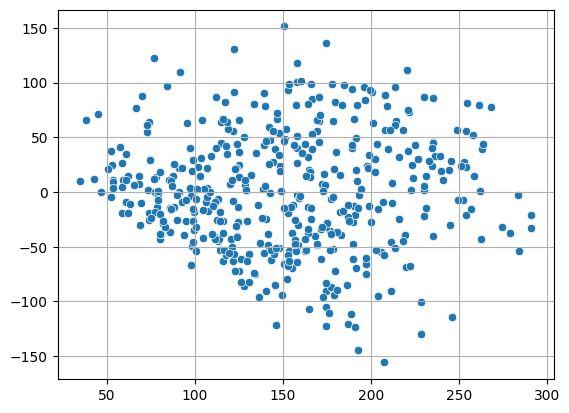

In [34]:
#scatterplot fitted values v/s residuals
sns.scatterplot(x=y1,y=residuals)
plt.grid()

In scatterplot points are not evenly spread, heteroskedasticity is present in the model.

Some statistical test used to test heteroskedasticity, one of the test is Breusch Pegan Test

In [41]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
tests = sms.het_breuschpagan(model1.resid, model1.model.exog)  #Breusch Pegan Test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
lzip(names,tests)

[('Lagrange multiplier statistic', 26.145362742107928),
 ('p-value', 0.00354952241928149),
 ('f-value', 2.709757288304633),
 ('f p-value', 0.0030981318142945763)]

p-value is less than 0.05 that means null hypothesis is rejected, heteroskedasticity is present

## 4. No Autocorrelation

Residual should be independent to each other. When the residuals are dependent on each other, there is autocorrelation. The simplest way to determine if this assumption is met is to perform a Durbin-Watson test.  
A test statistic of 2 indicates no serial correlation.  
The closer the test statistics is to 0, the more evidence of positive serial correlation.   
The closer the test statistics is to 4, the more evidence of negative serial correlation.

In [44]:
from statsmodels.stats.stattools import durbin_watson
d=durbin_watson(model1.resid)
print("d = ",d)

d =  2.028543219254427


here d= 2.03 which is closer to 2. so, No Autocorrelaton in the model

## 5. Normality of Residuals

The residuals of the model are normally distributed.

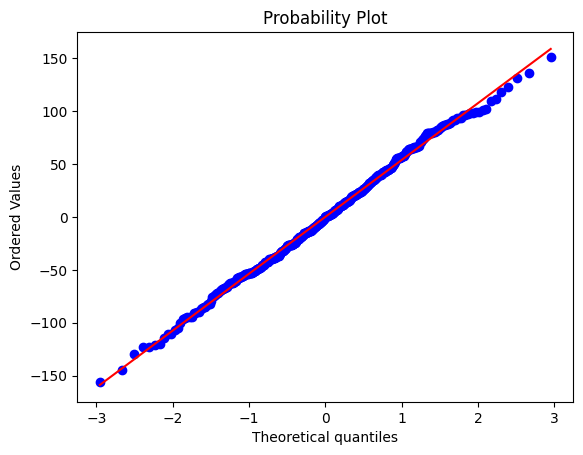

In [43]:
#we use qqplot for testing normality of residuals
import scipy.stats as stats
stats.probplot(residuals,dist='norm',plot=plt)
plt.show()

We observed from above qqplot that residuals are normally distributed.  
Normality can also be tested using Shapiro Wilk test-

In [44]:
from scipy.stats import shapiro
shapiro(residuals)

ShapiroResult(statistic=0.9970647692680359, pvalue=0.6161732077598572)

p-value is greater than 0.05, we failed to reject the null hypothesis that means residuals are normally distributed.